# Scraping

In [36]:
import re
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
response = requests.get("https://www.imdb.com/list/ls055386972/", headers={"Accept-Language":"en-US"})
soup = BeautifulSoup(response.content, "html.parser")

In [29]:
my_str = soup.find("div", class_="lister-item-content").find(class_="lister-item-year").string

In [30]:
my_str

'(1972)'

In [33]:
re.search(r'\d{4}', my_str).group(0)

'1972'

In [34]:
movies = []
for movie in soup.find_all("div", class_="lister-item-content"):
    title = movie.find("h3").find("a").string
    duration = int(movie.find(class_="runtime").string.strip(' min'))
    year = int(re.search(r"\d{4}", movie.find(class_="lister-item-year").string).group(0))
    movies.append({'title': title, 'duration': duration, 'year': year})
print(movies[0])

{'title': 'The Godfather', 'duration': 175, 'year': 1972}


In [35]:
movies[1]

{'title': "Schindler's List", 'duration': 195, 'year': 1993}

In [37]:
movies_df = pd.DataFrame(movies)

In [38]:
movies_df.head()

,title,duration,year
0,The Godfather,175,1972
1,Schindler's List,195,1993
2,12 Angry Men,96,1957
3,Life Is Beautiful,116,1997
4,"The Good, the Bad and the Ugly",178,1966


In [39]:
movies_dict = {'title': [], 'duration': [], 'year': []}
for movie in soup.find_all("div", class_="lister-item-content"):
    movies_dict['title'].append(movie.find("h3").find("a").string)
    movies_dict['duration'].append(int(movie.find(class_="runtime").string.strip(' min')))
    movies_dict['year'].append(int(re.search(r"\d{4}", movie.find(class_="lister-item-year").string).group(0)))
print(movies_dict['title'][0:2])

['The Godfather', "Schindler's List"]


In [40]:
movies_dict_df = pd.DataFrame.from_dict(movies_dict)
movies_dict_df.head()

,title,duration,year
0,The Godfather,175,1972
1,Schindler's List,195,1993
2,12 Angry Men,96,1957
3,Life Is Beautiful,116,1997
4,"The Good, the Bad and the Ugly",178,1966


In [ ]:
'https://www.imdb.com/search/title/?groups=top_250&sort=user_rating,desc&start=51&ref_=adv_nxt'
'https://www.imdb.com/search/title/?groups=top_250&sort=user_rating,desc&start=101&ref_=adv_nxt'
f'https://www.imdb.com/search/title/?groups=top_250&sort=user_rating,desc&start={num}&ref_=adv_nxt'

In [ ]:
for i in alguma_coisa:
    url = f'https://www.imdb.com/search/title/?groups=top_250&sort=user_rating,desc&start={num}&ref_=adv_nxt'

In [41]:
def fetch_page(page):
    response = requests.get(
        "https://www.imdb.com/search/title/",
        params={"groups":"top_250", "sort":"user_rating","start": (1 + page * 50)},
        headers={"Accept-Language":"en-US"})
    soup = BeautifulSoup(response.content, "html.parser")
    return soup

In [43]:
def parse_movies(soup):
    movies = []
    for movie in soup.find_all("div", class_="lister-item-content"):
        title = movie.find("h3").find("a").string
        duration = int(movie.find(class_="runtime").string.strip(' min'))
        year = int(re.search(r"\d{4}", movie.find(class_="lister-item-year").string).group(0))
        movies.append({'title': title, 'duration': duration, 'year': year})
    return movies

In [47]:
all_movies = []
for page in range(20):
    print(f"Parsing page {page + 1}...")
    soup = fetch_page(page)
    all_movies += parse_movies(soup)
print("Done")

Parsing page 1...
Parsing page 2...
Parsing page 3...
Parsing page 4...
Parsing page 5...
Parsing page 6...
Parsing page 7...
Parsing page 8...
Parsing page 9...
Parsing page 10...
Parsing page 11...
Parsing page 12...
Parsing page 13...
Parsing page 14...
Parsing page 15...
Parsing page 16...
Parsing page 17...
Parsing page 18...
Parsing page 19...
Parsing page 20...
Done


In [48]:
len(all_movies)

250

In [49]:
all_movies_df = pd.DataFrame(all_movies)

In [50]:
all_movies_df.tail()

,title,duration,year
245,It Happened One Night,105,1934
246,The Incredibles,115,2004
247,Aladdin,90,1992
248,Beauty and the Beast,84,1991
249,Life of Brian,94,1979


array([[<AxesSubplot:title={'center':'duration'}>,
        <AxesSubplot:title={'center':'year'}>]], dtype=object)

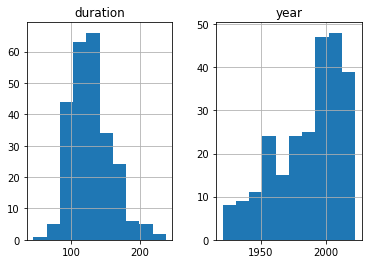

In [51]:
all_movies_df.hist()

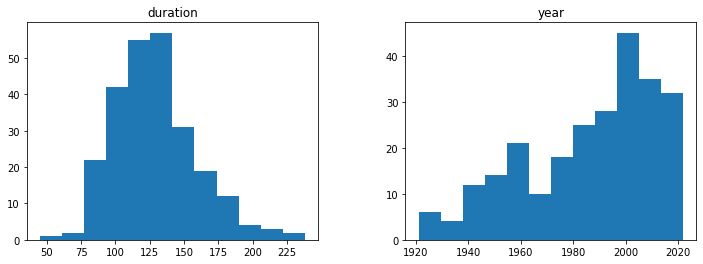

In [53]:
all_movies_df.hist(grid=False, bins=12, figsize=(12, 4));